# BC Wildfire Area Statistics Compilation
Author: Jason R. Wang

Last modified: 2019-10-18 (or the latest date shown on my GitHub repo)

See on GitHub: [jasonrwang/AB-Wildfire](https://github.com/jasonrwang/AB-Wildfire)

Most of this type of work has already been done by Tara Carman of the CBC, and I'm drawing a lot from her work.
- Tara Carman's [GitHub Repo](https://github.com/taracarman/BC_Wildfires/blob/master/BC%20Wildfires.ipynb)
- [Carman, Tara (2017, July 29). Area of B.C. burned by wildfires at a 56-year high. CBC News.](https://www.cbc.ca/news/canada/british-columbia/area-of-b-c-burned-by-wildfires-at-a-56-year-high-1.4226227)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

BC data comes in two flavours: as [fire incident points](https://catalogue.data.gov.bc.ca/dataset/fire-incident-locations-historical#edc-pow), and as [poly's drawn of the fire areas](https://catalogue.data.gov.bc.ca/dataset/fire-perimeters-historical#edc-pow). The former starts in 1950 and the latter in 1931. Let's compare the two to each other and to other data sources, with the aim of using as long a time period as possible.

Both sources have descriptions of the column headers in the links listed, and in the accompanying HTML files downloaded to the `data` folder.

In [2]:
df_pnt = pd.read_csv('data/BC/H_FIRE_PNT.csv', encoding="latin-1") # Note this file is almost 25 MB

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_pnt.columns

Index(['ZONE', 'FCODE', 'FIRE_YEAR', 'FIRE_TYPE', 'FIRE_NO', 'FIRE_ID',
       'FRCNTR', 'SIZE_HA', 'IGN_DATE', 'FIRELABEL', 'FIRE_CAUSE', 'GEO_DESC',
       'LATITUDE', 'LONGITUDE', 'OBJECTID', 'SHAPE', 'X', 'Y'],
      dtype='object')

Like for the `AB-Wildfire.ipynb`, I care the most about:
- Year
- Total area burned by the fire (not every reading is the total area burned)

Let's start with the point data.

### Point Data
Like Tara, we should filter these sets for just fires.

In [4]:
df_pnt['FIRE_TYPE'].value_counts()

Fire             146292
Nuisance          22491
Smoke Chase        9599
Unknown            1165
Duplicate           876
Test/Training       106
Name: FIRE_TYPE, dtype: int64

In [5]:
df_pnt = df_pnt[df_pnt['FIRE_TYPE'] == 'Fire']

# Check for remaining duplicated values
df_pnt.groupby(by='FIRE_YEAR')['FIRE_NO'].apply(pd.Series.duplicated).sum()

0

There are no duplicates left, so we can continue the quicker way.

In [6]:
df_pnt_sub = (df_pnt
           .loc[:,['FIRE_YEAR', 'SIZE_HA']]
           .rename(columns = {'FIRE_YEAR': 'Year', 'SIZE_HA': 'Area'})
          )

### Poly Data

In [7]:
df_ply = pd.read_csv('data/BC/H_FIRE_PLY.csv')

In [8]:
df_ply.columns

Index(['VERSION_NO', 'FIRE_CAUSE', 'FIRELABEL', 'FIRE_NO', 'LOAD_DATE',
       'SIZE_HA', 'OBJECTID', 'TRACK_DATE', 'FIRE_YEAR', 'SHAPE', 'METHOD',
       'FCODE', 'FIRE_DATE', 'SOURCE', 'X', 'Y'],
      dtype='object')

In [9]:
# It seems like this dataset only has wildfires and no testing fires
# df_pnt['FIRE_CAUSE'].value_counts() # Like other datasets

# Check for duplicated data
df_ply.groupby(by='FIRE_YEAR')['FIRE_NO'].apply(pd.Series.duplicated).sum()

3821

Uh oh. Looking deeper, it seems there's a discrepancy between earlier and later years. The earlier years are a bit more confusing, but the more recent data is split into areas. 



In [10]:
# Find all duplicates
# df_ply[ df_ply.groupby(by='FIRE_YEAR')['FIRE_NO'].apply(pd.Series.duplicated) ]

In [11]:
# Example of earlier years
df_ply[ df_ply.groupby(by='FIRE_YEAR')['FIRE_NO'].apply(pd.Series.duplicated) ].sort_values(['FIRE_NO','FIRE_YEAR']).head(10)

,VERSION_NO,FIRE_CAUSE,FIRELABEL,FIRE_NO,LOAD_DATE,SIZE_HA,OBJECTID,TRACK_DATE,FIRE_YEAR,SHAPE,METHOD,FCODE,FIRE_DATE,SOURCE,X,Y
7307,NaN,Person,1919-1,1,20070517.0,41.8,492681,NaN,1919,NaN,digitised,JA70003000,19190426.0,linens,NaN,NaN
9526,NaN,Person,1921-1,1,20070517.0,93.8,495020,NaN,1921,NaN,assumed_shape,JA70003000,19210616.0,linens,NaN,NaN
7161,NaN,Person,1923-1,1,20070517.0,2.3,493008,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN
7162,NaN,Person,1923-1,1,20070517.0,5.2,493009,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN
7163,NaN,Person,1923-1,1,20070517.0,2.3,493010,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN
7164,NaN,Person,1923-1,1,20070517.0,1.4,493011,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN
5673,NaN,Person,1924-1,1,20070517.0,16.6,491215,NaN,1924,NaN,digitised,JA70003000,19240425.0,linens,NaN,NaN
6960,NaN,Person,1924-1,1,20070517.0,30.7,493191,NaN,1924,NaN,digitised,JA70003000,19240429.0,linens,NaN,NaN
7170,NaN,Person,1924-1,1,20070517.0,53.2,492646,NaN,1924,NaN,digitised,JA70003000,19240501.0,linens,NaN,NaN
7496,NaN,Person,1930-1,1,20070517.0,610.3,492847,NaN,1930,NaN,digitised,JA70003000,19300513.0,linens,NaN,NaN


In [12]:
df_ply[(df_ply['FIRE_NO'] == '1') & (df_ply['FIRE_YEAR'] == 1923) ]

,VERSION_NO,FIRE_CAUSE,FIRELABEL,FIRE_NO,LOAD_DATE,SIZE_HA,OBJECTID,TRACK_DATE,FIRE_YEAR,SHAPE,METHOD,FCODE,FIRE_DATE,SOURCE,X,Y
6841,NaN,Person,1923-1,1,20070517.0,706.0,493351,NaN,1923,NaN,digitised,JA70003000,19230415.0,linens,NaN,NaN
7161,NaN,Person,1923-1,1,20070517.0,2.3,493008,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN
7162,NaN,Person,1923-1,1,20070517.0,5.2,493009,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN
7163,NaN,Person,1923-1,1,20070517.0,2.3,493010,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN
7164,NaN,Person,1923-1,1,20070517.0,1.4,493011,NaN,1923,NaN,digitised,JA70003000,19230505.0,linens,NaN,NaN


Looking manually at the data through the provided iMapBC interface [(see here)](https://maps.gov.bc.ca/ess/hm/imap4m/?catalogLayers=1756,1757,1758&scale=400000.0&center=-13161319.5843,6668201.90948), the above five records are all in separate areas and do not overlap.

In [13]:
# Example of recent years
df_ply[df_ply['FIRE_NO'] == 'G70333']

,VERSION_NO,FIRE_CAUSE,FIRELABEL,FIRE_NO,LOAD_DATE,SIZE_HA,OBJECTID,TRACK_DATE,FIRE_YEAR,SHAPE,METHOD,FCODE,FIRE_DATE,SOURCE,X,Y
18356,NaN,Lightning,2006-G70333,G70333,20071025.0,1518.3,503620,20060723.0,2006,NaN,Area 1 of 3,JA70003000,20060701.0,LANDSAT5,NaN,NaN
18369,NaN,Lightning,2006-G70333,G70333,20071025.0,116.9,503621,20060723.0,2006,NaN,Area 2 of 3,JA70003000,20060701.0,LANDSAT5,NaN,NaN
18370,NaN,Lightning,2006-G70333,G70333,20071025.0,7.9,503622,20060723.0,2006,NaN,Area 3 of 3,JA70003000,20060701.0,LANDSAT5,NaN,NaN


I'm happy enough based on these spot checks that the data is sufficient. I simply don't have the resources to do further validation right now. A good approach instead would be to find the duplicates with the largest area and check them out. Moving on....

In [14]:
df_ply_sub = (df_ply
           .loc[:,['FIRE_YEAR', 'SIZE_HA']]
           .rename(columns = {'FIRE_YEAR': 'Year', 'SIZE_HA': 'Area'})
          )

## Data Comparison (Validation)

Let's plot the two data series on top of one another.

First let's aggregate the data by year.

In [15]:
df_ply_sub = df_ply_sub.groupby(by='Year').sum().reset_index()
df_pnt_sub = df_pnt_sub.groupby(by='Year').sum().reset_index()

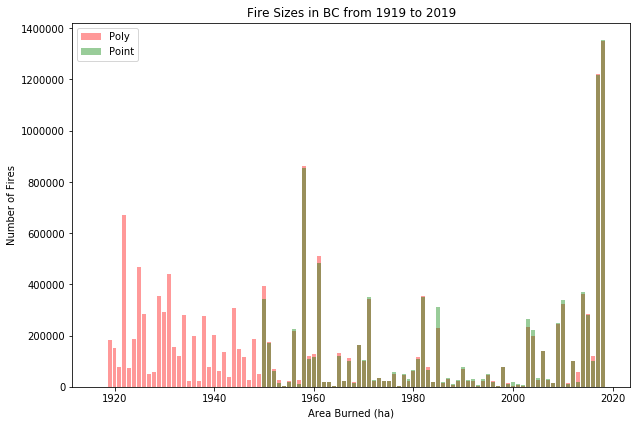

In [16]:
fig = plt.figure(figsize=(10,6.7))
ax = fig.add_subplot(111)

plt.bar(df_ply_sub['Year'], df_ply_sub['Area'], color='red', alpha = 0.4, label = 'Poly')
plt.bar(df_pnt_sub['Year'], df_pnt_sub['Area'], color='g', alpha = 0.4, label = 'Point')
plt.legend()

ax.set(xlabel = 'Area Burned (ha)',
       ylabel='Number of Fires',
       title='Fire Sizes in BC from 1919 to 2019')
plt.show()

Wow, the data visually looks to match quite well. I'm not going to do any additional data processing and instead just use the poly data as a complete set. Let's visually compare this to the [NFD](http://nfdp.ccfm.org/en/data/fires.php) numbers for BC (I can't download them as numbers, so a figure will have to do).

![NFD British Columbia 1990-2018](img/NFD_BC_1990-2018.png)

Let's add some recent data to the poly's dataset before we save it for other uses.

In [17]:
import requests
from bs4 import BeautifulSoup

# Inspect elements on the table 
page_name = 'http://bcfireinfo.for.gov.bc.ca/hprScripts/WildfireNews/Statistics.asp'
page = requests.get(page_name)

soup = BeautifulSoup(page.text, 'html.parser')
area2019 = float(
    soup
    .find_all('tr')[-1] # Last row in the table
    .find(align='right').contents[0] # First cell we want is the first with right align
    .replace(',','') # Clean string so we can turn into a float
    )

In [18]:
# 2019 data as of 2019-05-31 available from http://bcfireinfo.for.gov.bc.ca/hprScripts/WildfireNews/Statistics.asp
df_ply_sub = df_ply_sub.append(pd.DataFrame.from_dict({'Year': [2019], 'Area': [area2019]}))

df_ply_sub.to_csv('data/BCWildfires_1919-2019.csv', index=False)

And let's plot the poly data for easy sharing.

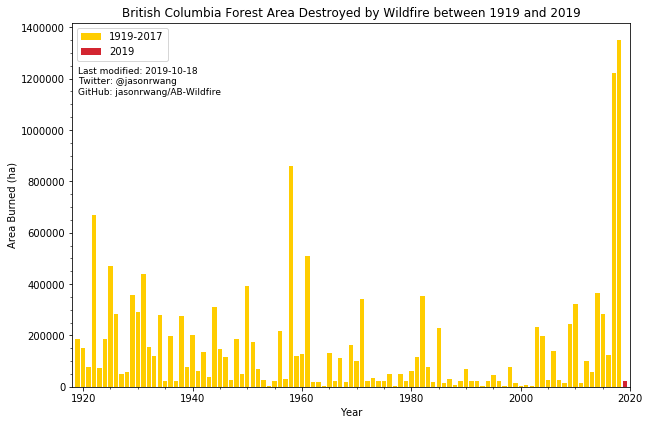

In [19]:
fig = plt.figure(figsize=(10,6.7))
ax = fig.add_subplot(111)

plt.bar(df_ply_sub['Year'].values, df_ply_sub['Area'].values, color='#ffcd00', label='1919-2017')
plt.bar(df_ply_sub['Year'].tail(1), df_ply_sub['Area'].tail(1), color='#d32530', label='2019')
# Colours taken from the BC flag :)
plt.legend()

ax.set(xlabel = 'Year',
       ylabel='Area Burned (ha)',
       title = 'British Columbia Forest Area Destroyed by Wildfire between 1919 and 2019')
ax.set_xlim([1918, 2020])
plt.minorticks_on()

credit = 'Last modified: 2019-10-18\nTwitter: @jasonrwang\nGitHub: jasonrwang/AB-Wildfire'
ax.text(1919, 1140000, credit, fontsize=9)

# Save the the figure for other uses
plt.savefig('img/BCWildfires_1919-2019.png')
plt.show()